In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from utils.dataloader import get_train_test_loaders, get_cv_train_test_loaders
from utils.model import CustomVGG
from utils.helper import train, evaluate, predict_localize
from utils.constants import NEG_CLASS

In [20]:
data_folder = "drive/MyDrive/data"
subset_name = "leather"
data_folder = os.path.join(data_folder, subset_name)

batch_size = 10
target_train_accuracy = 0.98
lr = 0.0001
epochs = 10
# class_weight = [3, 1]
class_weight = [1, 3] if NEG_CLASS == 1 else [3, 1]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

heatmap_thres = 0.7
n_cv_folds = 5

In [21]:
train_loader, test_loader = get_train_test_loaders(
    root=data_folder, batch_size=batch_size, test_size=0.2, random_state=42,
)

Dataset drive/MyDrive/data/leather: N Images = 369, Share of anomalies = 0.249


In [22]:

model = CustomVGG()

class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weight)
optimizer = optim.Adam(model.parameters(), lr=lr)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [23]:
model = train(
    train_loader, model, optimizer, criterion, epochs, device, target_train_accuracy
)

Epoch 1/10: Loss = 0.5635, Accuracy = 0.6724
Epoch 2/10: Loss = 0.2536, Accuracy = 0.9069
Epoch 3/10: Loss = 0.1861, Accuracy = 0.9276
Epoch 4/10: Loss = 0.1272, Accuracy = 0.9414
Epoch 5/10: Loss = 0.1173, Accuracy = 0.9793
Epoch 6/10: Loss = 0.1208, Accuracy = 0.9586
Epoch 7/10: Loss = 0.2017, Accuracy = 0.9103
Epoch 8/10: Loss = 0.1223, Accuracy = 0.9379
Epoch 9/10: Loss = 0.0983, Accuracy = 0.9690
Epoch 10/10: Loss = 0.1693, Accuracy = 0.9448


In [24]:
model_path = f"weights/{subset_name}_model.h5"
torch.save(model, model_path)

Accuracy: 0.9189
Balanced Accuracy: 0.9282



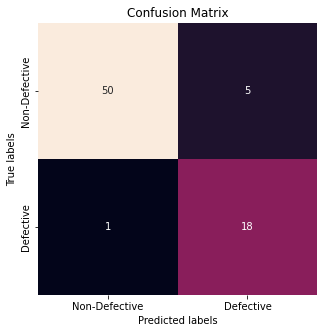

In [25]:
evaluate(model, test_loader, device)

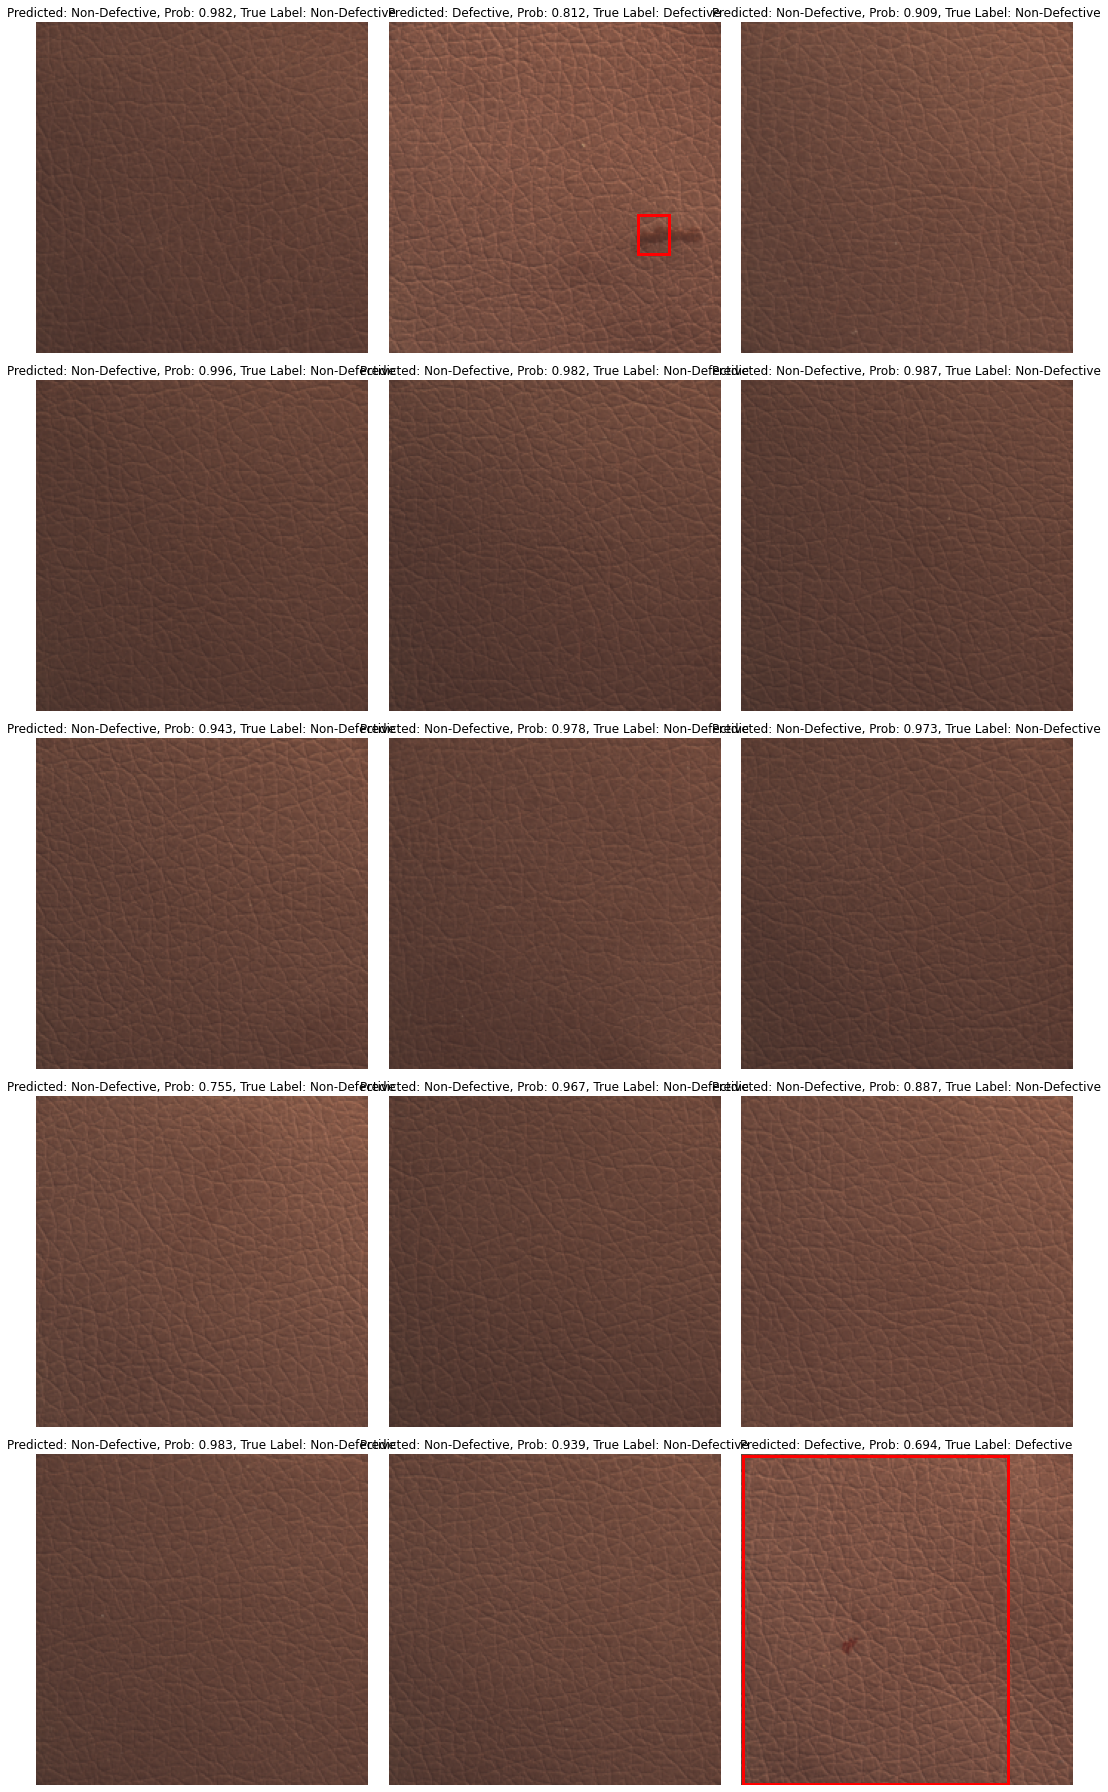

In [26]:
predict_localize(
    model, test_loader, device, thres=heatmap_thres, n_samples=15, show_heatmap=False
)